In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

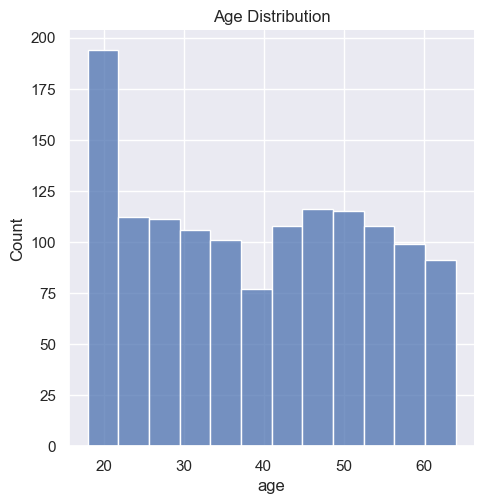

In [ ]:
# Age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title("Age Distribution")
plt.show()
#High density of people in their 20s

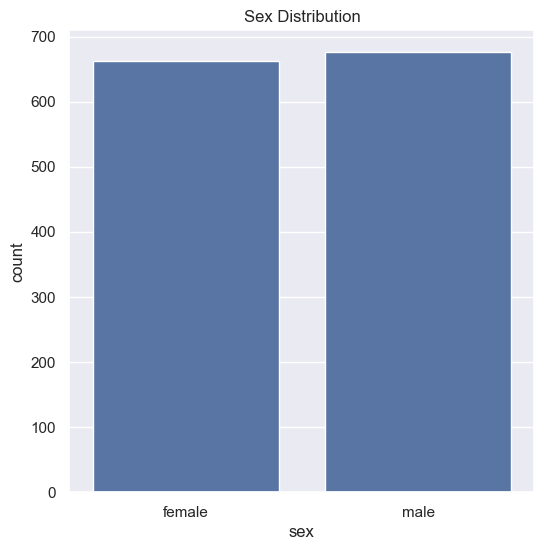

In [ ]:
#Gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=df)
plt.title("Sex Distribution")
plt.show()
#Almost identical counts

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

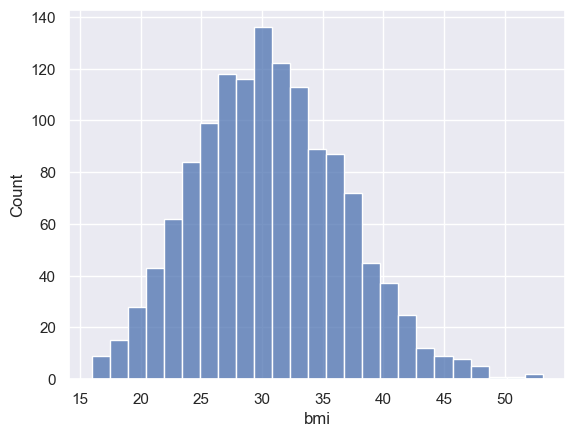

In [17]:
# BMI Distribution
sns.histplot(df['bmi'])
plt.show()

In [18]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
#Data encoding
# Change non-int columns to int
df.replace({'sex':{'male':0,'female':1}},inplace=True)


In [20]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [21]:
df.replace({'region':{'southeast':0,'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [23]:
# Split into independent/dependent feature(s)
X = df.drop(columns="charges",axis=1)
y = df['charges']

In [24]:
X


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [27]:
X_train.shape

(1070, 6)

In [28]:
X_test.shape

(268, 6)

In [29]:
# Simple linear regression model
reg = LinearRegression()

In [30]:
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
training_data_prediction = reg.predict(X_train)

In [33]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [34]:
r2_train

0.7576613389325046

In [35]:
test_data_prediction = reg.predict(X_test)

In [36]:
metrics.r2_score(y_test,test_data_prediction)

0.709512209861456

In [37]:
# Create sample input data
sample_input_data = (30,1,22.7,0,1,0)

In [38]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [39]:
input_data_as_numpy_array

array([30. ,  1. , 22.7,  0. ,  1. ,  0. ])

In [41]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [42]:
prediction = reg.predict(input_data_reshaped)

c:\Users\jperr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
print("The predicted insurance cost is ", prediction)

The predicted insurance cost is  [2292.02999245]
